# Метод k ближайших соседей для решения задачи классификации в биологии и медицине

Идея алгоритма **k ближайших соседей (k-nearest neighbors, KNN)** основана на гипотезе компактности: близкие объекты в пространстве признаков имеют схожие свойства. Алгоритм классифицирует новые данные по большинству классов их ближайших соседей из обучающей выборки.

Основные принципы:
1. Алгоритм не строит явную модель, а сохраняет все обучающие данные для последующего сравнения.
2. Для нового объекта вычисляются расстояния до всех точек обучающей выборки.
3. Выбираются k ближайших соседей.
4. Присваивается класс, наиболее частый среди этих соседей.

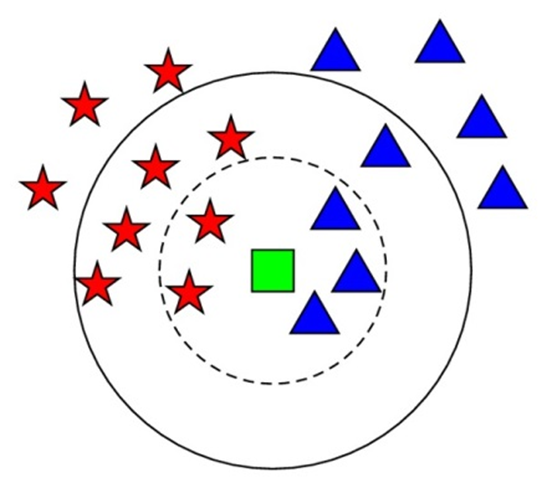

Таким образом, метод k-ближайших соседей (KNN) работает очень просто: чтобы определить класс нового объекта, алгоритм смотрит на k ближайших к нему объектов из обучающей выборки и относит новый объект к тому классу, который среди соседей встречается чаще всего.

При вычислении расстояний до каждого объекта важно определить меру, по которой это расстоние вычисляется. 

## 1. Евклидово расстояние

***Евклидово расстояние (Euclidean distance, $L2$)*** - классическая формула расстояния между двумя точками в пространстве признаков, вычисляется по теореме Пифагора и применяется по умолчанию для числовых признаков.
Формула Евклидова расстояния для двумерной плоскости: $D = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

Евклидово расстояние: 5.196152422706632


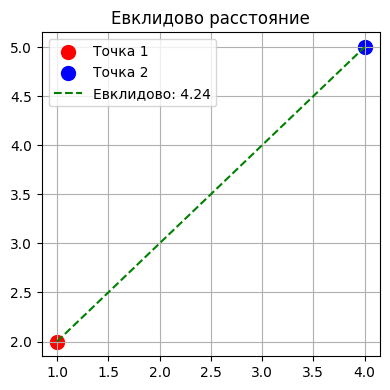

In [1]:
# Код в этой ячейке создан только для визуализации расстояния Евклида, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt

# Демонстрационные данные
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])

# Функция расстояния
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# Расчёт расстояния
print("Евклидово расстояние:", euclidean(point1, point2))

# Визуализация
fig, ax = plt.subplots(figsize=(4, 4))
plt.title("Евклидово расстояние")
plt.scatter(*point1[:2], c='r', s=100, label='Точка 1')
plt.scatter(*point2[:2], c='b', s=100, label='Точка 2')

# Отрисовка Евклидова расстояния
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 
         'g--', label=f'Евклидово: {euclidean(point1[:2], point2[:2]):.2f}')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2. Манхэттенское расстояние

***Манхэттенское расстояние (Manhattan, $L1$)*** - сумма модулей разностей по каждой координате, подходит, если важна сумма абсолютных отличий. Манхэттенское расстояние - это способ измерить, насколько далеко друг от друга находятся две точки, если двигаться только по прямым линиям вдоль осей, как по улицам, расположенным сеткой. Представьте себе город с кварталами, где вы можете идти только по улицам на север-юг и восток-запад, а не наискосок. Тогда расстояние между двумя точками - это сумма того, сколько нужно пройти по одной улице и сколько по другой. Манхэттенское расстояние называется так из-за уличной планировки района Манхэттен в Нью-Йорке, где улицы образуют квадратную сетку, и чтобы добраться из одной точки в другую, нужно двигаться только по прямым улицам на север-юг и восток-запад, а не по диагонали. Такое расстояние измеряется как сумма длин пройденных кварталов по этим улицам, что и отражает формула манхэттенского расстояния. 
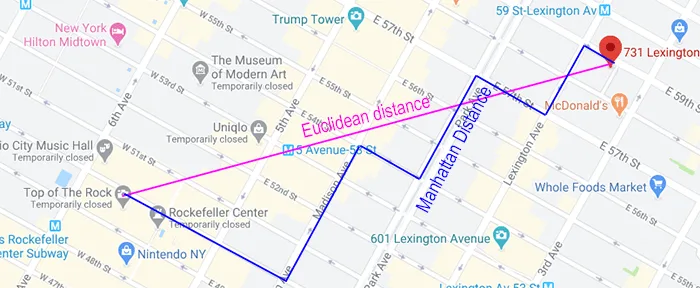
Формула манхэттенского расстояния для двумерной плоскости: $D = |x_1 - x_2| + |y_1 - y_2|$

Евклидово расстояние: 5.196152422706632
Манхэттенское расстояние: 9


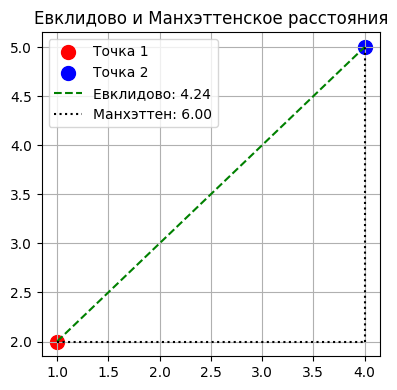

In [2]:
# Код в этой ячейке создан только для визуализации Манхэттенского расстояния, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

# Демонстрационные данные
point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])


# Функции расстояний
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

def manhattan(p1, p2):
    return np.sum(np.abs(p1 - p2))


# Расчёт расстояний
print("Евклидово расстояние:", euclidean(point1, point2))
print("Манхэттенское расстояние:", manhattan(point1, point2))

# Визуализация 2D-точек с линиями расстояний
fig, ax = plt.subplots(figsize=(4, 4))

# Числовые точки
plt.title("Евклидово и Манхэттенское расстояния")
plt.scatter(*point1[:2], c='r', s=100, label='Точка 1')
plt.scatter(*point2[:2], c='b', s=100, label='Точка 2')

# Евклидово расстояние (гипотенуза)
plt.plot([point1[0], point2[0]], [point1[1], point2[1]], 
         'g--', label=f'Евклидово: {euclidean(point1[:2], point2[:2]):.2f}')

# Манхэттенское расстояние (сумма катетов)
plt.plot([point1[0], point2[0]], [point1[1], point1[1]], 'k:')
plt.plot([point2[0], point2[0]], [point1[1], point2[1]], 'k:', 
         label=f'Манхэттен: {manhattan(point1[:2], point2[:2]):.2f}')

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 3. Расстояние Чебышёва

***Расстояние Чебышёва (Chebyshev, $L\infty$)*** - максимальное абсолютное отличие по одной из координат: $D = \max \left( |x_1 - x_2|, |y_1 - y_2| \right)$

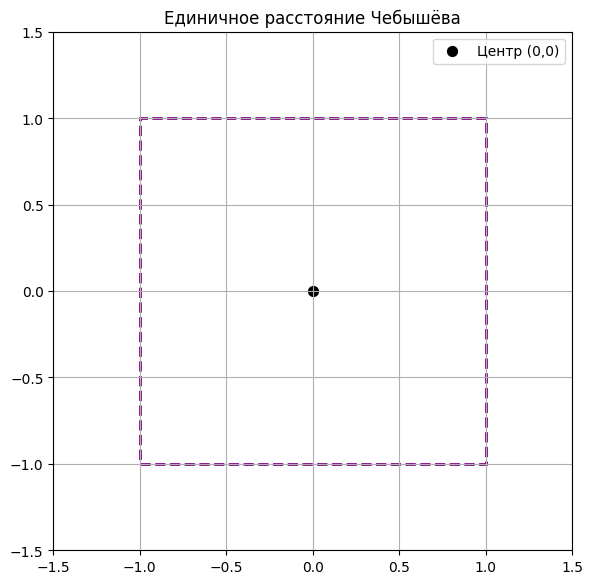

In [3]:
# Код в этой ячейке создан только для визуализации расстояния Чебышёва, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt

# Функция расстояния Чебышёва
def chebyshev(p1, p2):
    return np.max(np.abs(p1 - p2))

# Визуализация единичного расстояния
plt.figure(figsize=(6, 6))
plt.title("Единичное расстояние Чебышёва")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Отрисовка квадрата (единичная "сфера")
square = plt.Rectangle((-1, -1), 
                      2, 2, 
                      fill=False, 
                      edgecolor='purple',
                      linestyle='--',
                      linewidth=2)
plt.gca().add_patch(square)
plt.scatter(0, 0, c='k', s=50, label='Центр (0,0)')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.show()

## 4. Расстояние Минковского

***Расстояние Минковского*** - это обобщённая метрика для измерения расстояния между двумя точками в n-мерном пространстве, которая включает в себя разные виды расстояний в зависимости от параметра $p$. Формула для двумерной плоскости выглядит так:
$$D = \left( |x_1 - y_1|^p + |x_2 - y_2|^p \right)^{\frac{1}{p}}$$.

* При $p=1$ получается манхэттенское расстояние (сумма абсолютных разностей по координатам).
* При $p=2$ - евклидово расстояние (классическое "по прямой").
* При $p→\infty$ - расстояние Чебышёва (максимальная разница по координате).

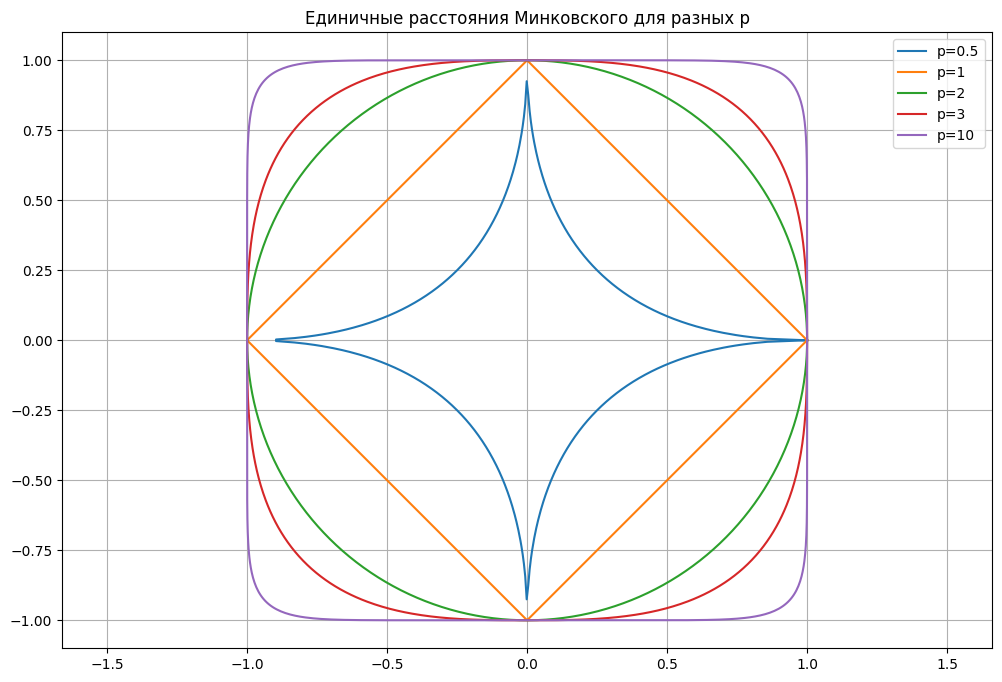

In [4]:
# Код в этой ячейке создан только для визуализации расстояния Минковского при разных значения p, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt

p_values = [0.5, 1, 2, 3, 10]
theta = np.linspace(0, 2*np.pi, 1000)

plt.figure(figsize=(12, 8))
for p in p_values:
    r = 1 / (np.abs(np.sin(theta))**p + np.abs(np.cos(theta))**p)**(1/p)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.plot(x, y, label=f'p={p}')

plt.axis('equal')
plt.legend()
plt.title('Единичные расстояния Минковского для разных p')
plt.grid(True)
plt.show()


## 5. Косинусное расстояния

***Косинусное расстояние*** - используется для сравнения направлений векторов, а не их длины.

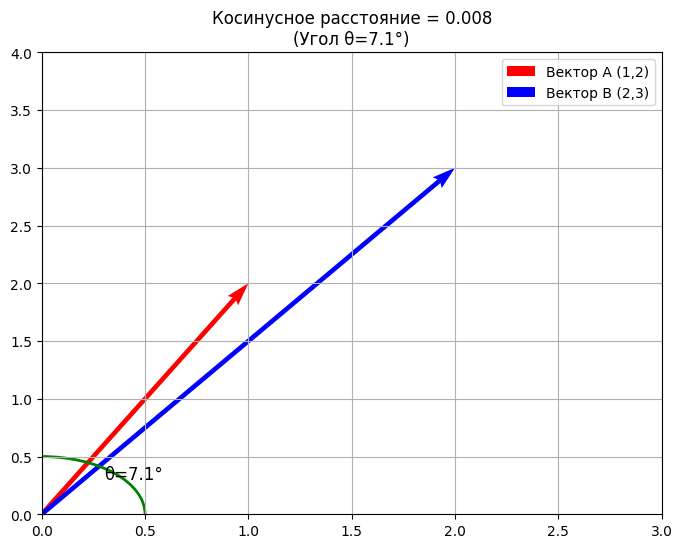

In [5]:
# Код в этой ячейке создан только для визуализации косинусного расстояния, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

# Данные
A = np.array([1, 2])
B = np.array([2, 3])

# Расчёт косинусного расстояния
cos_dist = cosine(A, B)  # 1 - cos(θ)

# Визуализация
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(0, max(A[0], B[0])+1)
ax.set_ylim(0, max(A[1], B[1])+1)

# Векторы
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, 
          color='r', label=f'Вектор A (1,2)')
ax.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, 
          color='b', label=f'Вектор B (2,3)')

# Угол между векторами
theta = np.arccos(1 - cos_dist)  # arccos(cos_sim) → θ в радианах
arc = plt.Circle((0,0), 0.5, color='green', fill=False, lw=2)
ax.add_patch(arc)
ax.text(0.3, 0.3, f'θ={np.degrees(theta):.1f}°', fontsize=12)

# Настройки
plt.grid(True)
plt.legend()
plt.title(f'Косинусное расстояние = {cos_dist:.3f}\n(Угол θ={np.degrees(theta):.1f}°)')
plt.show()


Косинусное расстояние - это способ измерить, насколько похожи два объекта, смотря на угол между их "векторами" (направлениями), а не на их длину. Представьте, что у каждого объекта есть стрелка в пространстве признаков. Если стрелки смотрят почти в одном направлении (угол между ними маленький), объекты похожи, если под разными углами - менее похожи. Косинусное расстояние основано на косинусе угла между этими векторами и не зависит от того, насколько длинны эти стрелки.

Проще говоря, косинусное расстояние показывает, насколько объекты "идут в одном направлении", игнорируя их размер или масштаб.

Формула косинусного расстония для двумерной плоскости: $$D = 1 - \frac{x_1 y_1 + x_2 y_2}{\sqrt{x_1^2 + x_2^2} \cdot \sqrt{y_1^2 + y_2^2}}$$

*P.S.: Косинусное расстояние не является метрикой, потому что оно нарушает неравенство треугольника - важное свойство, которое должно выполняться у всех метрик. Неравенство треугольника говорит, что расстояние между двумя точками не может быть больше суммы расстояний через третью точку. Это обеспечивает логичную и предсказуемую структуру пространства с расстояниями, что важно для многих алгоритмов и математических доказательств. Если косинусное расстояние не удовлетворяет этому свойству, значит "короткий путь" между двумя точками может оказаться длиннее, чем путь через третью точку, что противоречит интуиции о расстоянии. Из-за этого некоторые методы, которые требуют метрики (например, алгоритмы кластеризации или поиска ближайших соседей с гарантией сходимости), могут работать некорректно или нестабильно с косинусным расстоянием. В частности, нарушение неравенства треугольника усложняет анализ сходимости, построение геометрических структур и может привести к неожиданным результатам при вычислении расстояний между объектами.*

**Сводная таблица сравнения расстояний**

Расстояние| Достоинства | Недостатки |
|:--------:|:--------:|:--------:|
| Евклидово | Интуитивно понятное «прямое» расстояние. Оптимально для данных с изотропным распределением (равной важности признаков) | Чувствительно к выбросам. Не подходит для данных с разными масштабами признаков (требует нормализации) | 
| Манхэттенское | Устойчиво к выбросам. Эффективно в высокоразмерных пространствах. Лучше работает с разреженными данными (тексты) | Игнорирует связи между признаками. Менее интуитивно для визуализации | 
| Чебышёва | Эффективно для задач с доминирующим признаком. Быстрое вычисление | Игнорирует информацию других признаков. Не подходит для данных с равнозначными признаками | 
| Косинусное | Инвариантно к длине векторов. Оптимально для текстов. Эффективно в высокоразмерных пространствах | Не является метрикой (нарушает неравенство треугольника). Игнорирует абсолютные значения признаков | 

Выбранное расстояние влияет на разделяющие границы между классами. Вот как это выглядит для одного и того же примера данных.

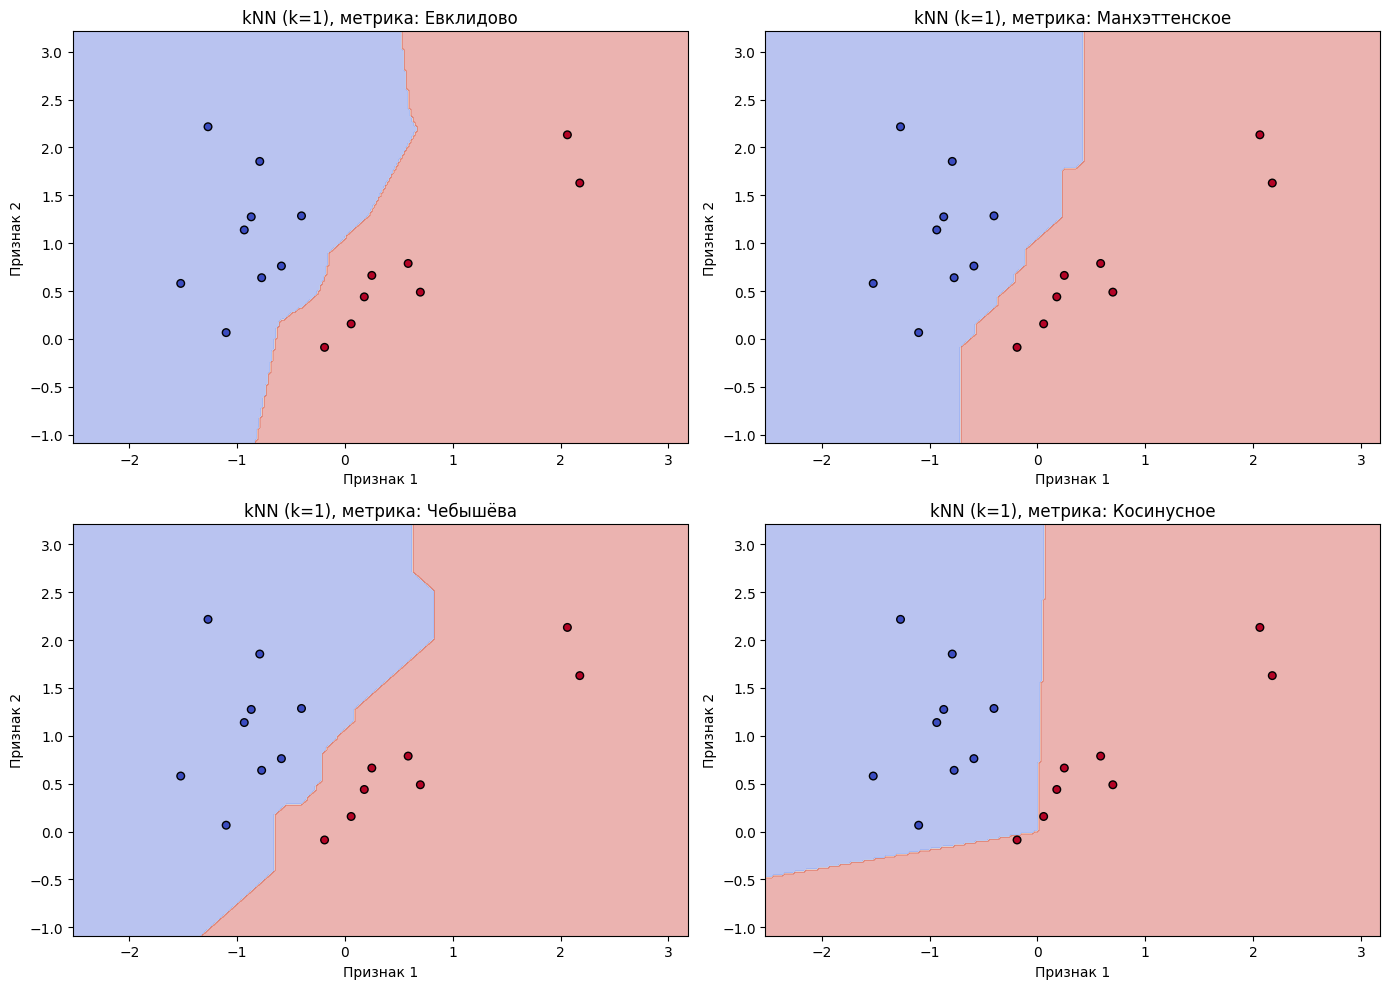

In [6]:
# Код в этой ячейке создан только для визуализации влияния разных расстояний на границу между классами, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Генерируем синтетические данные
X, y = make_classification(
    n_samples=17, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42
)

# Список метрик
metrics = [
    ('euclidean', 'Евклидово'),
    ('manhattan', 'Манхэттенское'),
    ('chebyshev', 'Чебышёва'),
    ('cosine', 'Косинусное')
]

# Сетка для отображения границ
h = .02  # шаг сетки
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(14, 10))

for i, (metric, metric_name) in enumerate(metrics, 1):
    clf = KNeighborsClassifier(n_neighbors=1, metric=metric)
    clf.fit(X, y)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f'kNN (k=1), метрика: {metric_name}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


## Выбор числа соседей

Выбор числа соседей $k$ в методе KNN - ключевой параметр, который сильно влияет на качество модели.

* Если $k$ слишком маленькое (например, $k=1$), модель становится очень чувствительной к шуму и выбросам, что может привести к переобучению - классификация будет зависеть от одного ближайшего соседа и может быть нестабильной.

* Если $k$ слишком большое, модель будет слишком сглаживать границы между классами, учитывая слишком много соседей, включая и удалённые точки, что может привести к недообучению и потере деталей структуры данных.

* Часто выбирают нечётное $k$ при двух классах, чтобы избежать ситуаций равенства голосов соседей.

Вот как выглядит разделяющая граница между классами при разном числе соседей.

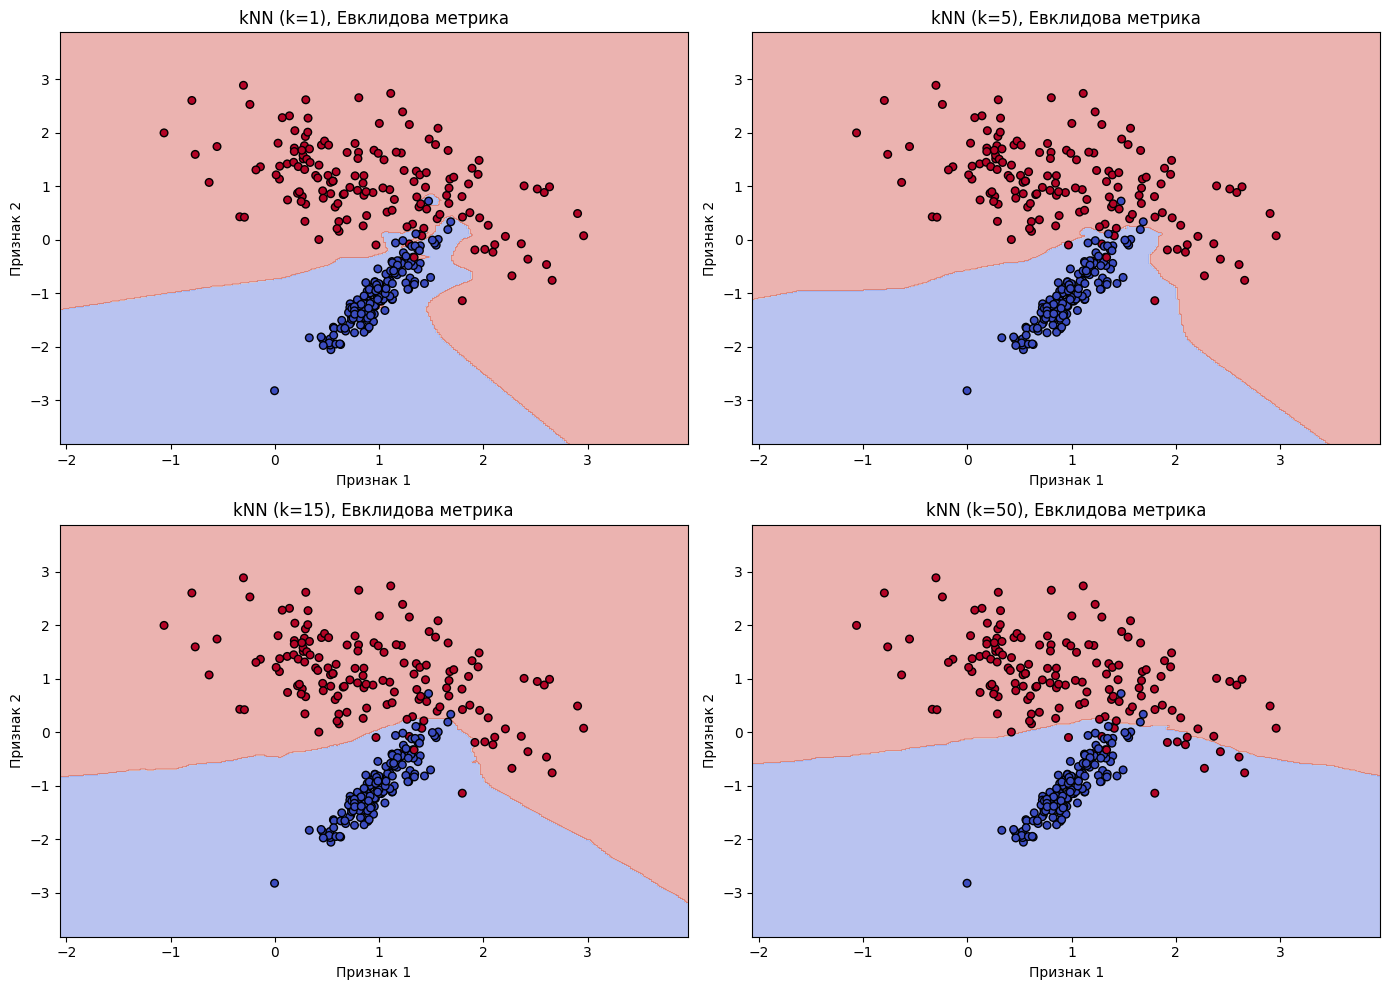

In [7]:
# Код в этой ячейке создан только для визуализации влияния числа соседей на границу между классами, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Генерация синтетических данных
X, y = make_classification(
    n_samples=300, 
    n_features=2, 
    n_redundant=0, 
    n_clusters_per_class=1, 
    n_classes=2, 
    random_state=42
)

# Параметры визуализации
h = 0.02  # Шаг сетки
k_values = [1, 5, 15, 50]  # Разные значения K
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(14, 10))

for i, k in enumerate(k_values, 1):
    # Обучение модели
    clf = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    clf.fit(X, y)
    
    # Предсказание на сетке
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f'kNN (k={k}), Евклидова метрика')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


Метод KNN чувствителен к выбросам, особенно при малых $k$. Манхэттенское расстояние более устойчиво к выбросам, чем расстоние Евклида.

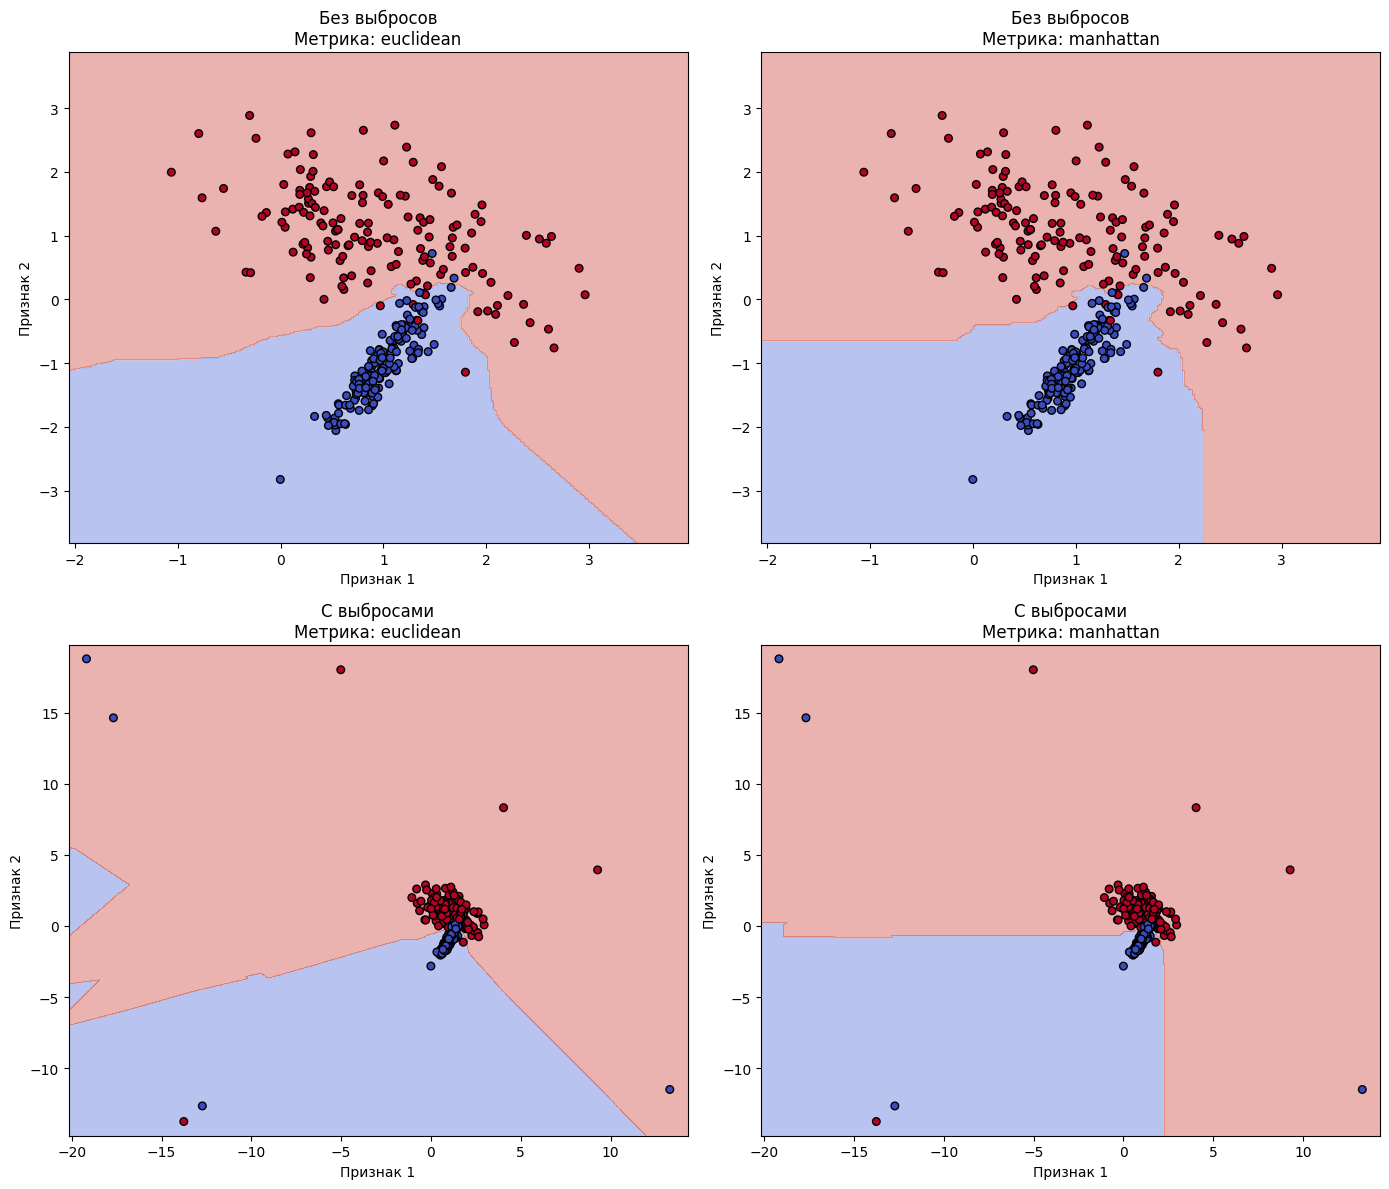

In [8]:
# Код в этой ячейке создан только для визуализации влияния выбросов, можно его не изучать!

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Генерация исходных данных
X_clean, y_clean = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_classes=2,
    random_state=42
)

# Добавление выбросов
outliers_n = 8
np.random.seed(42)
outliers = np.random.uniform(low=-20, high=20, size=(outliers_n, 2))
X_noisy = np.vstack([X_clean, outliers])
y_noisy = np.hstack([y_clean, np.random.randint(0, 2, outliers_n)])

# Настройки визуализации
h = 0.02
metrics = ['euclidean', 'manhattan']
titles = ['Без выбросов', 'С выбросами']
datasets = [(X_clean, y_clean), (X_noisy, y_noisy)]

plt.figure(figsize=(14, 12))

for i, (X, y) in enumerate(datasets, 1):
    # Определение границ сетки
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    for j, metric in enumerate(metrics, 1):
        # Обучение модели
        clf = KNeighborsClassifier(n_neighbors=5, metric=metric)
        clf.fit(X, y)
        
        # Предсказание на сетке
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Визуализация
        plt.subplot(2, 2, (i-1)*2 + j)
        plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
        plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.coolwarm)
        plt.title(f'{titles[i-1]}\nМетрика: {metric}')
        plt.xlabel('Признак 1')
        plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()


## Построение модели kNN для классификации назначения лекарственного препарата

Рассмотрим набор данных, содержащих информацию о 200 пациентах и лекарствах, которые им были назначены. 

Он включает следующие признаки:

* Age: возраст пациента;
* Sex: пол пациента ("F" для женского, "M" для мужского);
* BP: уровень артериального давления ("HIGH", "NORMAL", "LOW");
* Cholesterol: уровень холестерина ("HIGH", "NORMAL");
* Na_to_K: отношение уровня натрия к уровню калия в крови;
* Drug: тип назначенного лекарства (drugA, drugB, drugC, drugX, drugY), это целевая переменная, которую мы хотим предсказать.

In [9]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


Проверим, есть ли дисбаланс классов.

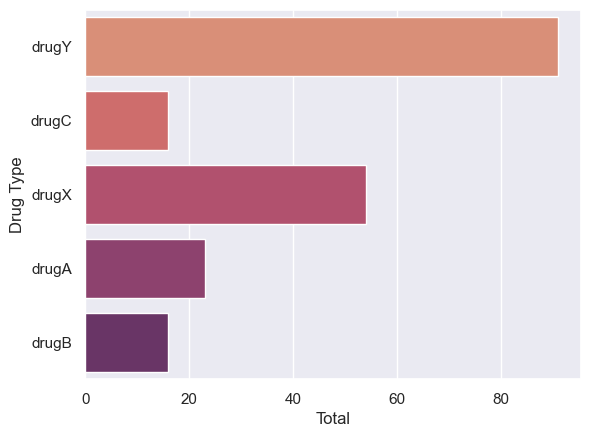

In [10]:
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Лекарство "drugY" назначают чаще других, это нужно учесть при подготовке данных и построении модели.

Создадим признак "возрастная группа пациентов". Возрастные группы позволяют легче выявлять закономерности и тенденции, связанные с рисками заболеваний или особенностями поведения пациентов, которые могут отличаться в разные периоды жизни.Группировка снижает влияние случайных колебаний и шумов, которые могут возникать при работе с точным возрастом, особенно если данных мало или возраст распределён неравномерно. Перевод возраста в возрастные группы помогает сделать медицинские модели более устойчивыми, понятными и релевантными для практического применения

In [11]:
import pandas as pd

def categorize_age_who(age):
    """
    Разделяет возраст на группы согласно классификации ВОЗ:
    https://www.euro.who.int/__data/assets/pdf_file/0005/98438/GEHA_News_2002_1_Russian.pdf

    Args:
        age (int): Возраст.

    Returns:
        str: Возрастная группа.
    """
    if age < 18:
        return "Подросток"
    elif age <= 24:
        return "Молодой взрослый"
    elif age <= 44:
        return "Взрослый"
    elif age <= 60:
        return "Пожилой"
    elif age <= 74:
        return "Старший"
    elif age <= 89:
        return "Почтенный"
    else:
        return "Долгожитель"

def apply_age_categorization(df, age_column='Age'):
    """
    Применяет функцию categorize_age_who к столбцу 'Age' DataFrame.

    Args:
        df (pd.DataFrame): DataFrame, содержащий столбец с возрастом.
        age_column (str): Название столбца с возрастом.  По умолчанию 'Age'.

    Returns:
        pd.DataFrame: DataFrame с добавленным столбцом 'Age_Category'.
    """
    df['Age_Category'] = df[age_column].apply(categorize_age_who)
    return df



df = apply_age_categorization(df)

In [12]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_Category
0,23,F,HIGH,HIGH,25.355,drugY,Молодой взрослый
1,47,M,LOW,HIGH,13.093,drugC,Пожилой
2,47,M,LOW,HIGH,10.114,drugC,Пожилой
3,28,F,NORMAL,HIGH,7.798,drugX,Взрослый
4,61,F,LOW,HIGH,18.043,drugY,Старший


Подготовим данные для построения моделей:
- разделим признаки на входные и целевой;
- разделим выборку на обучающую, валидационную и тестовую в соотношении 60%, 20% и 20%.
- укажем категориальные и количественные признаки;
- проведем кодирование входных признаков с использованием `OneHotEncoder`;
- проведем масштабирование с использованием `StandardScaler`;
- проведем кодирование целевого признака с использованием `LabelEncoder`.

In [13]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
RANDOM_STATE=4

X = df.drop(columns=['Age', 'Drug'])
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_STATE, 
                                                  stratify=y_train) 
cat_col_names = ['Sex', 'BP', 'Cholesterol', 'Age_Category']
num_col_names = ['Na_to_K']

In [14]:
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_val_ohe = encoder.transform(X_val[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
X_val_ohe = pd.DataFrame(X_val_ohe, columns=encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_val_scaled = scaler.transform(X_val[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)
    
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1)
X_val = pd.concat([X_val_ohe, X_val_scaled], axis=1)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [16]:
X_test.head()

,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL,Age_Category_Молодой взрослый,Age_Category_Подросток,Age_Category_Пожилой,Age_Category_Старший,Na_to_K
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.374000
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.053178
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.319713
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.923916
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.752984


Обучим модели для разных видов расстоний и оценим их качество при помощи метрики $accuracy$ на валидационной выборке. Метод KNN в `sklearn` реализуется через класс `KNeighborsClassifier` (для классификации) или `KNeighborsRegressor` (для регрессии). 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 85.00%


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='manhattan')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 80.00%


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='chebyshev')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 60.00%


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='cosine')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 82.50%


В случае когда классов больше двух простое большинство соседей может быть неоднозначным и для повышеня точности можно использовать взвешивание голосов соседей по расстоянию. Вместо простого подсчёта количества соседей каждого класса, каждому соседу присваивается вес, который обычно уменьшается с ростом расстояния до классифицируемого объекта. Это значит, что ближние соседи влияют сильнее, а более удалённые - слабее.

Такой подход особенно полезен когда:
* число соседей $k$ большое, и среди них есть как очень близкие, так и более удалённые объекты;
* в задачах с несколькими классами, где простое большинство соседей может быть неоднозначным;
* чтобы уменьшить влияние дальних соседей и повысить устойчивость к шуму и выбросам.

Взвешивание по расстоянию помогает сделать классификацию более гибкой и точной, учитывая, что не все соседи одинаково важны.

В библиотеке `scikit-learn` для метода $k$ ближайших соседей (KNN) взвешивание голосов соседей задаётся параметром `weights` в классах `KNeighborsClassifier` и `KNeighborsRegressor`.

1. Значение `weights='uniform'` означает, что все соседи влияют одинаково (по умолчанию).
2. Значение `weights='distance'` задаёт веса, обратно пропорциональные расстоянию до соседа: ближние соседи влияют сильнее, удалённые - слабее.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 87.50%


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 82.50%


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='chebyshev')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 70.00%


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='cosine')
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 87.50%


Подберем число соседей $k$ перебором на валидационной выборке.

k=1, Точность: 0.7250
k=2, Точность: 0.7250
k=3, Точность: 0.8500
k=4, Точность: 0.8000
k=5, Точность: 0.8750
k=6, Точность: 0.9000
k=7, Точность: 0.8750
k=8, Точность: 0.8750
k=9, Точность: 0.8750
k=10, Точность: 0.8750
k=11, Точность: 0.9000
k=12, Точность: 0.9250
k=13, Точность: 0.9250
k=14, Точность: 0.9250
k=15, Точность: 0.9250
k=16, Точность: 0.9250
k=17, Точность: 0.9250
k=18, Точность: 0.9250
k=19, Точность: 0.9250
k=20, Точность: 0.9250


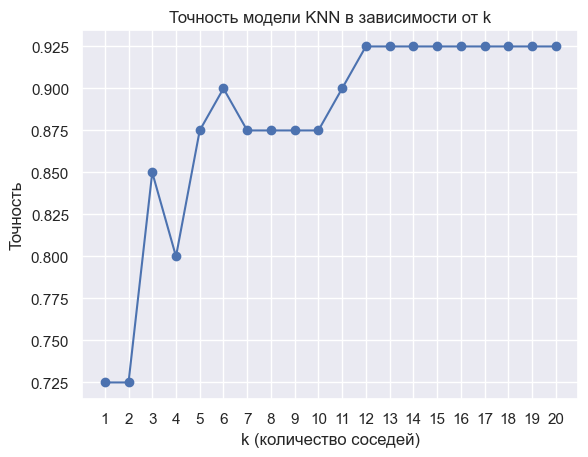


Значение k для наибольшей точности: 12
Наивысшая точность: 0.9250


In [28]:
# Список значений k для перебора
k_values = range(1, 21)  # Пробуем k от 1 до 20
accuracies = []

# Обучение и оценка модели для каждого значения k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}, Точность: {accuracy:.4f}")

# Визуализация результатов
plt.plot(k_values, accuracies, marker='o')
plt.title('Точность модели KNN в зависимости от k')
plt.xlabel('k (количество соседей)')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Определение оптимального значения k
best_k = k_values[np.argmax(accuracies)]
best_accuracy = np.max(accuracies)

print(f"\nЗначение k для наибольшей точности: {best_k}")
print(f"Наивысшая точность: {best_accuracy:.4f}")

Слишком большое $k$ ухудшает точность и способность модели отражать реальные закономерности в данных, снижая качество предсказаний на новых данных. В качестве оптимального числа соседей возьмём $k=6$, которое меньше $12$, но при этом не сильно теряет в качестве: $accuracy=0.900$ на валидационной выборке.

Оценим качество модели лучшей модели на тестовой выборке. Лучшие значения гиперпараметров оказались: косинусное расстояние (`metric='cosine'`), взвешивание голосов соседей по расстоянию (`weights='distance'`) и число соседей, равное 6 (`n_neighbors=6`).

**(!) Обратите внимание, что подбор гиперпараметров мы осуществляли на валидационной выборке, а на тестовой выборке проверяется качество только одной фиальной модели!**

In [30]:
# Получаем названия классов из LabelEncoder
class_names = le.classes_
class_names

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

Точность: 0.90


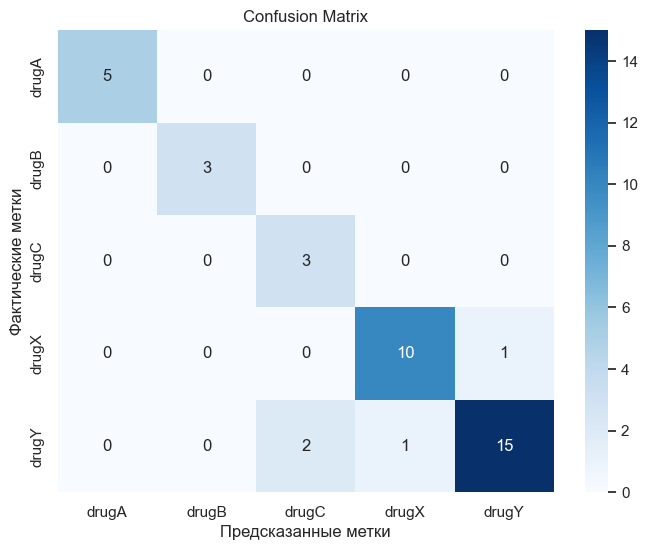


Таблица с Accuracy, Precision, Recall, F1-score:
             precision   recall f1-score  support
drugA          100.00%  100.00%  100.00%      5.0
drugB          100.00%  100.00%  100.00%      3.0
drugC           60.00%  100.00%   75.00%      3.0
drugX           90.91%   90.91%   90.91%     11.0
drugY           93.75%   83.33%   88.24%     18.0
accuracy        90.00%   90.00%   90.00%      0.9
macro avg       88.93%   94.85%   90.83%     40.0
weighted avg    91.69%   90.00%   90.33%     40.0


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Создание и обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', metric='cosine') 
knn.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = knn.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Получаем названия классов из LabelEncoder
class_names = le.classes_

# Визуализация Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Предсказанные метки")
plt.ylabel("Фактические метки")
plt.show()


# 2. Classification Report (Accuracy, Precision, Recall, F1-score)
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Форматирование значений в проценты с двумя знаками после запятой
df_report[['precision', 'recall', 'f1-score', 'support']] = df_report[['precision', 'recall', 'f1-score', 'support']].fillna(0)  # Заполнение NaN нулями
df_report[['precision', 'recall', 'f1-score']] = df_report[['precision', 'recall', 'f1-score']] * 100
df_report[['precision', 'recall', 'f1-score']] = df_report[['precision', 'recall', 'f1-score']].applymap('{:.2f}%'.format)

class_mapping = dict(zip(le.transform(le.classes_), le.classes_))
# Создаем новый индекс на основе class_mapping для замены численных меток классов на строковые
new_index = []
for i in df_report.index:
    if i in class_mapping:  # Проверяем, есть ли индекс в словаре class_mapping
        new_index.append(class_mapping[i])  # Если да, заменяем его строковым значением из class_mapping
    else:
        new_index.append(i)  # Если нет (например, 'accuracy', 'macro avg'), оставляем как есть

df_report.index = new_index  # Устанавливаем новый индекс для DataFrame


print("\nТаблица с Accuracy, Precision, Recall, F1-score:")
print(df_report)

Средняя точность модели довольно неплохая - 90%! Интепретируйте осталные метрики качества модели самостоятельно.

***Зачетное задание по теме***

Во втором практическом занятии 3-го модуля в качестве зачетного задания по теме была предложена задача бинарной  классификации определения доброкачественности (`benign`) или злокачественности (`malignant`) опухоли груди на основе данных, полученных из изображений, созданных при помощи тонкоигольной аспирационной биопсии (FNA) опухоли груди (файл `BreastCanser.csv`). Постройте модель k ближайших соседей. Для этого:

1. Загрузите данные.
2. Проведите предварительную подготовку:
    - разделите признаки на входные и целевой;
    - разделите выборку на обучающую, валидационную и тестовую в соотношении 60%, 20% и 20%.
    - проведите масштабирование с использованием `StandardScaler`.
3. Постройте модель k ближайших соседей для классификации опухоли, оцените её качество на валидационной выборке при помощи метрик `Presicion` и `Recall`.
4. Варьируя гиперпараметрами `metric`, `weights` и `n_neighbors` добейтесь максимального качества модели на валидационной выборке.
5. Оцените качество модели на тестовой выборке. Сделайте выводы.

In [1]:
# в этой ячейке должен быть Ваш код
# 1. Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score


In [2]:
# 2. Загрузка данных
df = pd.read_csv('BreastCanser.csv')

# Преобразование целевого признака: 'B' -> 0, 'M' -> 1
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

# Удаляем лишние колонки, если есть
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)


In [3]:
# 3. Разделение признаков и целевого признака
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [4]:
# 4. Разделение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки с сохранением пропорций классов
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25*0.8=0.2


In [5]:
# 5. Создание пайплайна: масштабирование + KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])


In [6]:
# 6. Обучение базовой модели и оценка на валидационной выборке
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)
print(f"Базовая модель - Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Базовая модель - Recall: {recall_score(y_val, y_val_pred):.4f}")


Базовая модель - Precision: 1.0000
Базовая модель - Recall: 0.9302


In [7]:
# 7. Настройка гиперпараметров metric, weights и n_neighbors с помощью GridSearchCV
param_grid = {
    'knn__n_neighbors': list(range(1, 21)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)


Лучшие параметры: {'knn__metric': 'euclidean', 'knn__n_neighbors': 18, 'knn__weights': 'uniform'}


In [8]:
# 8. Оценка лучшей модели на валидационной выборке
best_model = grid_search.best_estimator_
y_val_pred_best = best_model.predict(X_val)
print(f"Лучшая модель - Precision: {precision_score(y_val, y_val_pred_best):.4f}")
print(f"Лучшая модель - Recall: {recall_score(y_val, y_val_pred_best):.4f}")


Лучшая модель - Precision: 1.0000
Лучшая модель - Recall: 0.9302


In [9]:
# 9. Оценка качества модели на тестовой выборке
y_test_pred = best_model.predict(X_test)
print(f"Тестовая выборка - Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Тестовая выборка - Recall: {recall_score(y_test, y_test_pred):.4f}")


Тестовая выборка - Precision: 0.9730
Тестовая выборка - Recall: 0.8571


In [10]:
# 10. Вывод
print("Модель KNN с оптимальными параметрами показывает высокое качество классификации опухолей.")


Модель KNN с оптимальными параметрами показывает высокое качество классификации опухолей.
